# Exploring Spotify and other stuffs

## Research Questions

How has the duration of songs changed over the past century with the introduction of new music technology? 

## Data cleaning
- Have an initial draft of your data cleaning appendix
- Document every step that takes your raw data files and turns it into the analysis-ready dataset that you would submit with your final project
- All of your data cleaning code should be found in this section and you may want to explain the steps of your data cleaning in words as well


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

raw_year_data = pd.read_csv("data_by_year.csv")
raw_genre_data = pd.read_csv("data_by_genres.csv")
raw_artist_data = pd.read_csv("data_by_artist.csv")
raw_total_data = pd.read_csv("data.csv")

#Removing Relevant Columns
new_year_data = raw_year_data[['year','danceability', 'duration_ms','instrumentalness','liveness','loudness','tempo','valence','popularity']]
new_genre_data = raw_genre_data[['genres','danceability', 'duration_ms','instrumentalness','liveness','loudness','tempo','valence','popularity']]
new_artist_data = raw_artist_data[['artists','danceability', 'duration_ms','instrumentalness','liveness','loudness','tempo','popularity']]

#Cleaning Artist Data

new_artist_data.drop_duplicates()
new_artist_data.iloc[0:27261] #removed artists with names that aren't English

#Cleaning Genre Data
new_genre_data.iloc[2:] #removing first two non-sensiscal rows

#dropping unwanted columns and creating new dataframe

new_data = raw_total_data.copy()
new_year = new_year_data.copy()
#new_data.drop(["danceability","name","speechiness","acousticness","id","release_date","loudness","liveness","key","instrumentalness","explicit","energy","mode","valence"])

#grouping data by year and averaging the duration and tempo of all the songs released in that year

duration_year = new_data.groupby(["year"])['duration_ms','tempo'].mean()
df_year = pd.DataFrame(duration_year)
print(df_year)

#renaming columns in new dataframe

#df_year.rename(columns={"duration_ms":"Avg_Dur_ms"})

#capitalizing names of columns

df_year.columns = df_year.columns.str.capitalize()

#create new data frame with innovative technologies
new_technologies = pd.DataFrame( {"year" : [1925, 1928, 1931, 1935, 1937, 1940, 1954, 1962, 1963, 1965, 1972, 1979, 1982, 1986, 1989, 1991, 1995, 1997, 2001, 2004, 2007],
                                 "innovation" : ['Victor Orthophonic Victrola Phonograph', 'Magnetic Tape', 'The LP', 'AEG Magnetophon Tape Recorder', 'Bell Labs Two-Channel Stereo', 'The Vocoder',
                                                'Regency TR-1 Transistor Radio', 'JTM45 Amplifier', 'Phillips Compact Cassette Tape', '8-Track Tape', 'Technics SL-1200 Turntables',
                                                'The Walkman', 'Commercial Compact Disc', 'Akai S900 Sampler', 'The World Wide Web', 'Pro Tools', 'The MP3', 'Auto-Tune', 'iPod', 'GarageBand', 'SoundCloud']
                                 })

#print(new_technologies)
#finding dataset with genre, match the duration in ms to this dataset to find the genres of each year

#show new dataframe


        duration_ms       tempo
year                           
1921  229911.914062  100.397758
1922  167904.541667  101.376139
1923  178356.301775  112.456598
1924  188461.649789  120.653359
1925  184130.699620  115.671715
...             ...         ...
2016  219400.763840  119.070344
2017  209343.613000  116.840278
2018  200919.119000  122.004325
2019  197733.133000  118.868163
2020  197114.662301  121.228704

[100 rows x 2 columns]


<ipython-input-49-94bffc2f9088>:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  duration_year = new_data.groupby(["year"])['duration_ms','tempo'].mean()


## Data description 
- The data we have collected analyzes the audio features of 160,000+ songs on Spotify released between 1920 and 2020. Through grouping the tracks in terms of genre and release date (year) we aimed to explore how music has changed over the last century and in what ways. In order to assess the specific ways in which songs have changed, we chose to analyze danceability, song duration, acousticness, popularity, and tempo of tracks. Our group was specifically interested in what ways the evolution of new music technology may have influenced the progression of certain acoustic elements over others. For example, how did the release of the transistor radio or the iPod potentially influence the most popular music genres and audio qualities? We were also especailly intersted in how the emergence of new social media applications that foster short time spans may have possibly contribtued to a decrease in song duration as more emphasis in song creation is placed upon making a quick, catchy "hit".

## Data limitations 
- Some constraints that exist within our datasets include our inability to compare genres over many years. Our original huge dataset grouped songs by artist and release date, but not by genre. As a result, we were able to compile information on different ....

## Exploratory data analysis
- Our initial data exploration has shown interseting trends in song duration, popularity, and danceability. Our quick analysis shows us that in the last decade song duration initially showed a pretty strong trend in increasing song duration, however in the last decade this trend has taken a sharp decline. Popularity also shows an incredibly linear relationship over the last century. Danceability ....

LinearRegression()


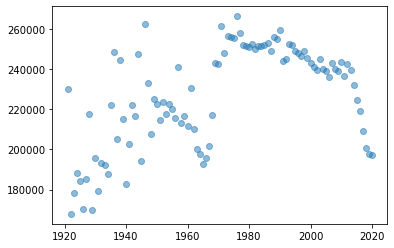

In [50]:
comparison_model = LinearRegression().fit( new_data[['year']], new_data['danceability'])
print(comparison_model)

plt.scatter(new_year['year'], new_year['duration_ms'], alpha=0.5)


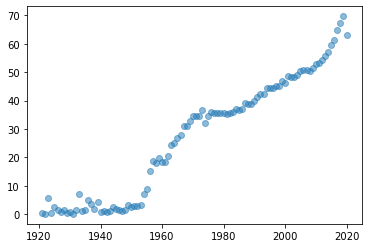

In [51]:
plt.scatter(new_year['year'], new_year['popularity'], alpha=0.5)

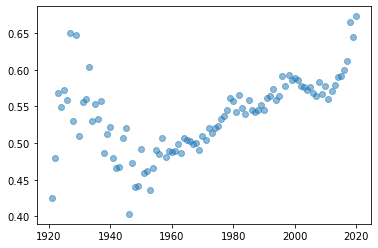

In [53]:
plt.scatter(new_year['year'], new_year['danceability'], alpha=0.5)

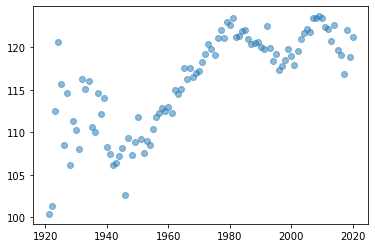

In [55]:
plt.scatter(new_year['year'], new_year['tempo'], alpha=0.5)

## Questions for reviewers
- We want to consolidate the genres we have (currently there are over 2000 unique genres), but we're not sure the best way to do this. 
- Is it okay that we are primarily using the consolidated data_by_year dataset to create most of our graphs and draw most of our conclusions? Because our huge data set with 160,000+ songs is so long, we were unable to make analyses directly from that dataset without comparing the data when it was not aggregated by year. 
